In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import warnings
warnings.filterwarnings('ignore')

<h1>Titanic survival prediction</h1>

<h3>Understanding the shape of the data set</h3>
<h3>Removing data with alphanumerical values, missing values, doesn't help with the data (Name, Age, Cabin)</h3>
<h3>Encoding the values so that it's easier to process</h3>
<h3>Performing both linear regression and decision tree classifier</h3>

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print('Number of Training = {}'.format(train_data.shape[0]))
print('Number of test = {}'.format(test_data.shape[0]))

train_data.columns

Number of Training = 891
Number of test = 418


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Look at numeric and categorical values seperately**

<h5>Numerical Features  : Age,Fare,SibSp,Parch</h5>
<h5>Categorical Features : Survived, Sex, Embarked, Pclass</h5>
<h5>Alphanumeric Feature(but categorical): Ticket, Cabin</h5>

<h5>In our overview report, click on the tab "Warnings":</h5>

<ul><li>Tickets and cabins are features with a high cardinality
    <li>Age and Cabin has a lot of missing values
    <li>Name and ID has unique values
    <li>SibSp,Parch and are has a lot of zeros



In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


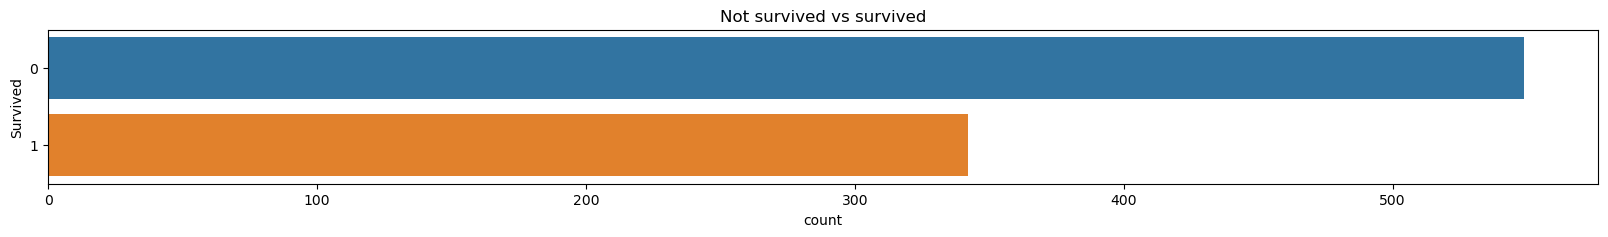

In [14]:
plt.figure(figsize=(20,2))
sns.countplot(y="Survived",data=train_data)
plt.title("Not survived vs survived")
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

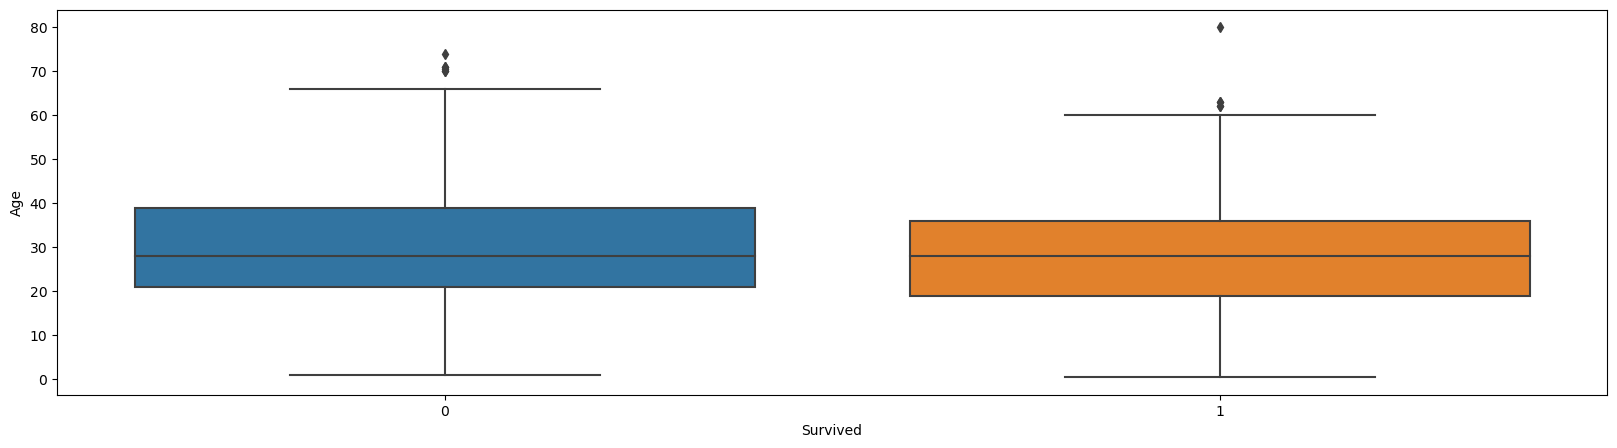

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(x="Survived",y="Age", data=train_data)

In [16]:
train_data = train_data.drop(["Age"],axis=1)
test_data = test_data.drop(["Age"],axis=1)

In [17]:
train_data = train_data.drop(["Ticket"],axis=1)
test_data = test_data.drop(["Ticket"],axis=1)

In [18]:
train_data = train_data.drop(["Cabin"],axis=1)
test_data = test_data.drop(["Cabin"],axis=1)

In [19]:
train_data = train_data.drop(["Name"],axis=1)
test_data = test_data.drop(["Name"],axis=1)

<Axes: xlabel='count', ylabel='Embarked'>

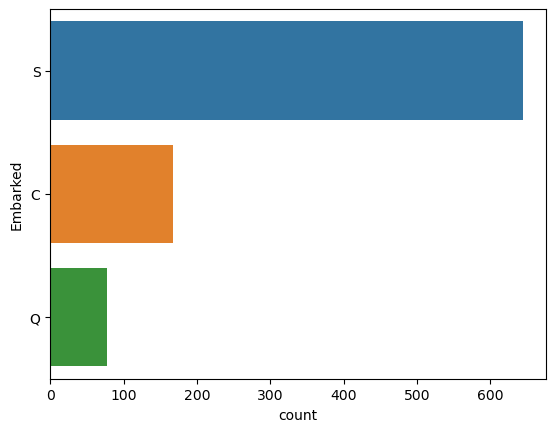

In [20]:
sns.countplot(y="Embarked",data=train_data)

In [21]:
train_data=train_data.fillna({"Embarked":"S"})

<Axes: xlabel='count', ylabel='Sex'>

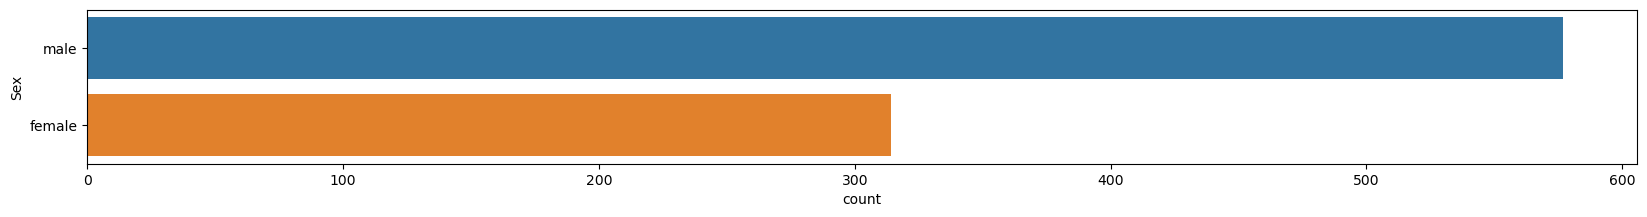

In [22]:
plt.figure(figsize=(20,2))
sns.countplot(y="Sex",data=train_data)

In [23]:
import numpy as np
train_data["Sex"] = np.where(train_data["Sex"]=="female",1,0)
test_data["Sex"] = np.where(test_data["Sex"]=="female",1,0)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S


In [25]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,7.8292,Q
1,893,3,1,1,0,7.0000,S
2,894,2,0,0,0,9.6875,Q
3,895,3,0,0,0,8.6625,S
4,896,3,1,1,1,12.2875,S


In [26]:
embarked_oh = pd.get_dummies(train_data["Embarked"],prefix="embarked")
sex_oh = pd.get_dummies(train_data["Sex"],prefix="sex")
pclass_oh = pd.get_dummies(train_data["Pclass"],prefix="pclass")

In [27]:
print(embarked_oh)

     embarked_C  embarked_Q  embarked_S
0         False       False        True
1          True       False       False
2         False       False        True
3         False       False        True
4         False       False        True
..          ...         ...         ...
886       False       False        True
887       False       False        True
888       False       False        True
889        True       False       False
890       False        True       False

[891 rows x 3 columns]


In [28]:
df_encoded = pd.concat([train_data,embarked_oh,sex_oh,pclass_oh],axis=1)
print(df_encoded)

     PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0              1         0       3    0      1      0   7.2500        S   
1              2         1       1    1      1      0  71.2833        C   
2              3         1       3    1      0      0   7.9250        S   
3              4         1       1    1      1      0  53.1000        S   
4              5         0       3    0      0      0   8.0500        S   
..           ...       ...     ...  ...    ...    ...      ...      ...   
886          887         0       2    0      0      0  13.0000        S   
887          888         1       1    1      0      0  30.0000        S   
888          889         0       3    1      1      2  23.4500        S   
889          890         1       1    0      0      0  30.0000        C   
890          891         0       3    0      0      0   7.7500        Q   

     embarked_C  embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  \
0         False       

In [29]:
df_encoded = df_encoded.drop(["Pclass","Sex","Embarked"],axis=1)
df_encoded.head()


,PassengerId,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,1,0,7.2500,False,False,True,True,False,False,False,True
1,2,1,1,0,71.2833,True,False,False,False,True,True,False,False
2,3,1,0,0,7.9250,False,False,True,False,True,False,False,True
3,4,1,1,0,53.1000,False,False,True,False,True,True,False,False
4,5,0,0,0,8.0500,False,False,True,True,False,False,False,True


In [30]:
test_embarked_oh = pd.get_dummies(test_data["Embarked"],prefix="embarked")
test_sex_oh = pd.get_dummies(test_data["Sex"],prefix="sex")
test_pclass_oh = pd.get_dummies(test_data["Pclass"],prefix="pclass")

test_data=pd.concat([test_data,test_embarked_oh,test_sex_oh,test_pclass_oh],axis=1)

test_data = test_data.drop(["Pclass","Sex","Embarked"],axis=1)

test_data.head()

,PassengerId,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,0,0,7.8292,False,True,False,True,False,False,False,True
1,893,1,0,7.0000,False,False,True,False,True,False,False,True
2,894,0,0,9.6875,False,True,False,True,False,False,True,False
3,895,0,0,8.6625,False,False,True,True,False,False,False,True
4,896,1,1,12.2875,False,False,True,False,True,False,False,True


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y=df_encoded["Survived"]
x=df_encoded.drop(["Survived","PassengerId"],axis=1)

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [33]:
x.shape

(891, 11)

In [34]:
y.shape

(891,)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_val)

acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
acc_logreg

D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.1

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_val)
acc_dt = round(accuracy_score(y_pred,y_val)*100,2)
acc_dt

82.84

In [37]:
test_data.head()

,PassengerId,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,0,0,7.8292,False,True,False,True,False,False,False,True
1,893,1,0,7.0000,False,False,True,False,True,False,False,True
2,894,0,0,9.6875,False,True,False,True,False,False,True,False
3,895,0,0,8.6625,False,False,True,True,False,False,False,True
4,896,1,1,12.2875,False,False,True,False,True,False,False,True


In [38]:
pd.isnull(test_data).sum()

PassengerId    0
SibSp          0
Parch          0
Fare           1
embarked_C     0
embarked_Q     0
embarked_S     0
sex_0          0
sex_1          0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [39]:
test_data = test_data.fillna(0)
pd.isnull(test_data).sum()

PassengerId    0
SibSp          0
Parch          0
Fare           0
embarked_C     0
embarked_Q     0
embarked_S     0
sex_0          0
sex_1          0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [40]:
submission = pd.DataFrame()
submission["PassengerId"] = test_data["PassengerId"]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [41]:
test_data=test_data.drop("PassengerId",axis=1)
test_data.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,0,0,7.8292,False,True,False,True,False,False,False,True
1,1,0,7.0000,False,False,True,False,True,False,False,True
2,0,0,9.6875,False,True,False,True,False,False,True,False
3,0,0,8.6625,False,False,True,True,False,False,False,True
4,1,1,12.2875,False,False,True,False,True,False,False,True


In [42]:
predictions = logreg.predict(test_data)
submission["Survived"] = predictions
submission.to_csv("submission.csv", index=False) 